<a href="https://www.kaggle.com/code/ericmutisya/logisticregression-l1-threshold-lowering?scriptVersionId=139736995" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Dataset Information

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

<mark>Sex:</mark> male or female(Nominal)

<mark>Age:</mark> Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral

<mark>Current Smoker:</mark> whether or not the patient is a current smoker (Nominal)

<mark>Cigs Per Day:</mark> the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

<mark>BPMeds:</mark> whether or not the patient was on blood pressure medication (Nominal)

<mark>Prevalent Stroke:</mark> whether or not the patient had previously had a stroke (Nominal)

<mark>PrevalentHyp:</mark> whether or not the patient was hypertensive (Nominal)

<mark>Diabetes:</mark> whether or not the patient had diabetes (Nominal) Medical(current)

<mark>TotChol:</mark> total cholesterol level (Continuous)

<mark>SysBP:</mark> systolic blood pressure (Continuous)

<mark>DiaBP:</mark> diastolic blood pressure (Continuous)

<mark>BMI:</mark> Body Mass Index (Continuous)

<mark>Heart Rate:</mark> heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

<mark>Glucose:</mark> glucose level (Continuous)

<mark>Predict variable</mark> (desired target) 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import numpy as np 
import pandas as pd 
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [4]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [6]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

We have missing values for: 

education: Nominal

cigsperday: continuous

BPMeds: Nominal

totChol: continuous

BMI: continuous

heartRate: continuous

glucose: continuous

For nominal data types we will fill the NaNs with the most frequent and mean for continuous. Is not a good idea to drop them. 

### EDA

In [7]:
pp.ProfileReport(df)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Imputation

Before we impute, we should split our data into train and test set to avoid data leakage

In [8]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
x_n = df[['education', 'BPMeds']]
x_c = df.drop(['TenYearCHD', 'education', 'BPMeds'], axis = 1)
y = df['TenYearCHD']
print(x_n.shape)
print(x_c.shape)
print(y.shape)

(4238, 2)
(4238, 13)
(4238,)


Remember we want to fill our nominal data with the most frequent and continous data with their mean

In [10]:
x_train_n, x_test_n, y_train, y_test = train_test_split(x_n, y, test_size = 0.2, random_state = 24)
x_train_c, x_test_c, y_train, y_test = train_test_split(x_c, y, test_size = 0.2, random_state = 24)


In [11]:
# Impute nominal features with the most frequent observation
imp_n = SimpleImputer(strategy = 'most_frequent')
x_train_n = imp_n.fit_transform(x_train_n)
x_test_n = imp_n.transform(x_test_n)

In [12]:
# Impute continuous features with mean, the default imputer is mean
imp_n = SimpleImputer()
x_train_c = imp_n.fit_transform(x_train_c)
x_test_c = imp_n.transform(x_test_c)

In [13]:
# Concantenate them together
x_train = np.append(x_train_n, x_train_c, axis = 1)
x_test = np.append(x_test_n, x_test_c, axis = 1)

Lets xheck if there are any NaNs, just to confirm

In [14]:
print(np.isnan(x_train).sum(axis=0))
print(np.isnan(x_test).sum(axis=0))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


There are no NaNs

Lets now see the shape of our test and train set, just to make sure thy are 2D arrays

In [15]:
print(x_train.shape)
print(x_test.shape)

(3390, 15)
(848, 15)


### Scaling

In [16]:
scaler = StandardScaler()

In [17]:
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

### Model Evaluation

Instead of using;

Feature Selection: Backward elimination (P-value approach) to simplify a model by iteratively removing features that are statistically insignificant. It's important to note that while backward elimination can simplify models and improve their interpretability, it's not always the best approach. Some considerations include:

<mark> Collinearity: </mark> Backward elimination may not handle multicollinearity well. Removing one feature might lead to changes in the significance of others due to intercorrelations.

<mark> Model Fit: </mark> Removing features can lead to a loss of information and potential underfitting if important variables are removed prematurely.

<mark> Domain Knowledge: </mark> Features might be important for reasons not captured by statistical significance alone. Prior domain knowledge is valuable.

<mark> Multiple Testing: </mark> Adjusting for multiple testing might be necessary to control for false positives when considering p-values.
    
   Therefore, I decided to use L1, <mark> LASSO </mark> to shrink features that are not of significant for this model.

In [18]:
logreg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
logreg.fit(x_train_s, y_train)
y_pred = logreg.predict(x_test_s)
print('Model Test Accuracy:', logreg.score(x_test_s, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Test Accuracy: 0.8431603773584906
[[704   4]
 [129  11]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       708
           1       0.73      0.08      0.14       140

    accuracy                           0.84       848
   macro avg       0.79      0.54      0.53       848
weighted avg       0.83      0.84      0.79       848



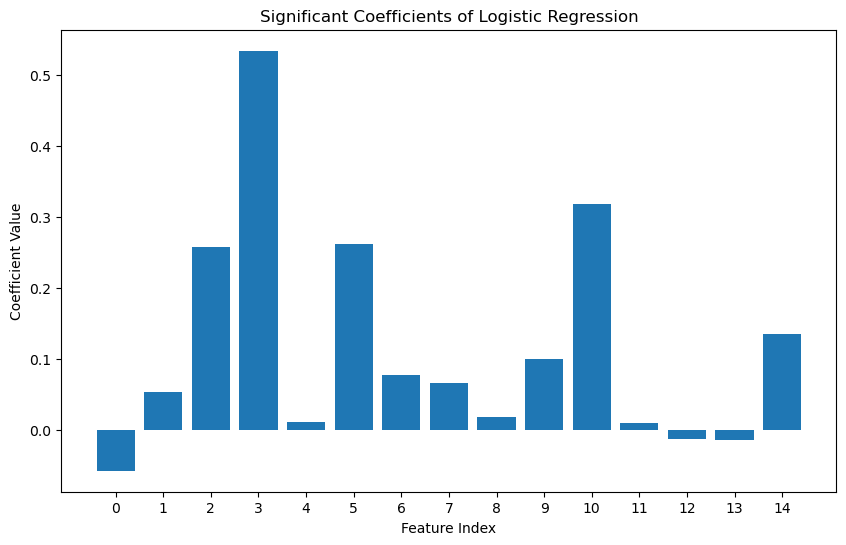

In [19]:
coefficients = logreg.coef_[0]

# Plot the significant coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), range(len(coefficients)))
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Significant Coefficients of Logistic Regression')
plt.show()

In [20]:
y_pred_prob = logreg.predict_proba(x_test_s)[:, 1]
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob))

ROC AUC Score: 0.7109866828087167


We see that our model is performing better than a model making random guess by 42%

### Model Evaluation - Statistics
From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.

#### lower the threshold
Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

In [21]:
new_threshold = 0.2

# Reclassify based on the new threshold
y_pred_prob_lowered = (y_pred_prob > new_threshold).astype(np.int)

print( confusion_matrix(y_test, y_pred_prob_lowered))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_lowered))
print(classification_report(y_test, y_pred_prob_lowered))

[[567 141]
 [ 70  70]]
ROC AUC Score: 0.6504237288135594
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       708
           1       0.33      0.50      0.40       140

    accuracy                           0.75       848
   macro avg       0.61      0.65      0.62       848
weighted avg       0.80      0.75      0.77       848



Adjusting the threshold can affect the trade-off between precision and recall, which might be crucial depending on your specific problem and objectives as for this problem.

#### <mark>Let me know if there is anything you might want us to discuss.</mark>